In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./RunAnova')
import two_way_anova as anov
import pandas as pd
from imp import reload
import numpy as np

In [2]:
factors_levels = {'wheel':[], 'gas':[]}


#create data
df = pd.DataFrame({'wheel': np.tile(['two', 'four'], 4),
                   'gas': np.tile(['regular', 'octane', 'octane', 'regular'],2),
                   'consumption': [26.7, 26.1, 32.3, 28.6,
                          25.2, 24.2, 32.8, 29.3]})
display(df)
                  
for col in df.columns:
    if col in factors_levels:
        factors_levels[col] = list(df[col].unique())
factors_levels

,wheel,gas,consumption
0,two,regular,26.7
1,four,octane,26.1
2,two,octane,32.3
3,four,regular,28.6
4,two,regular,25.2
5,four,octane,24.2
6,two,octane,32.8
7,four,regular,29.3


{'wheel': ['two', 'four'], 'gas': ['regular', 'octane']}

In [3]:
anova_proc = anov.TwoWayAnova(df, resp_var='consumption', factors_levels=factors_levels)


consumption
wheel gas                 
four  octane         25.15
      regular        28.95
two   octane         32.55
      regular        25.95

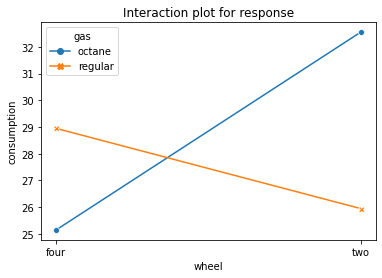

In [4]:
anova_proc.plot_interaction_response()

In [10]:
anova_proc.run_anova()

critical values wheel: 7.708647422176786
critical values gas: 7.708647422176786
critical values interaction: 7.708647422176786
                 sum_sq   df          F    PR(>F)
C(wheel)           9.68  1.0  11.733333  0.026648
C(gas)             3.92  1.0   4.751515  0.094766
C(wheel):C(gas)   54.08  1.0  65.551515  0.001265
Residual           3.30  4.0        NaN       NaN
We reject the null hypothesis for C(wheel)
We fail to reject the null hypothesis for C(gas)
We reject the null hypothesis for C(wheel):C(gas)
